In [1]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

We will drop the columns that we don't use in our analysis

In [2]:
# Constants
DATA_FILE = 'data/tmdb-movies.csv'
DROP_COLUMNS = ['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'production_companies', 'tagline', 'overview', 'release_date', 'keywords']

In [3]:
# Load Data
df = pd.read_csv(DATA_FILE)
df.shape

(10866, 21)

In [4]:
#Using Pandas-Profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Functions

In [5]:
# missing Data
def per_missing(df):
    
    """ 
    Select the columns that have missing values and summition of the missing values 
    and the percent of the missing valus from all the data
        
    parameters:
    * df: Data Frame
    
    Rerurns: missing table that contains the count of missing values and it's percentage
    
    """
    
    missing_count = df.isna().sum().sort_values(ascending=False)
    missing_percent = (100 * df.isna().sum().sort_values(ascending=False)) / len(df)
    missing_count = pd.DataFrame(missing_count[missing_count>0])
    missing_percent = pd.DataFrame(missing_percent[missing_percent>0])
    missing_table = pd.concat([missing_count, missing_percent], axis=1)
    missing_table.columns = ['missing_count', 'missing_percent']
    
    return missing_table

# ------------------------------------------------------------------------------------------------------

# fill zero with median
def fill_by_median(pd_series):
    """
    fill zeros with median of the column
    
    parameters:
    * pd_series: The column
        
    """
    pd_series.replace(0, np.nan, inplace=True)
    median = pd_series.median()
    pd_series.fillna(median, inplace=True)

# ------------------------------------------------------------------------------------------------------    
    
# Visualization
def bar_plot(x, y, data):
    """
    make a bae plot chart for the data without confidence interval
    
    parameters:
    * x: the columns will be draw on the x axis
    * y: the columns will be draw on the y axis    
    """
    plt.figure(figsize = (8,4), dpi = 100)
    sns.barplot(x = x, y = y, data=data, ci=None)
    plt.show()

# Assessing

In [6]:
# take a look at the data
df.head()

id    imdb_id  popularity  ...  release_year    budget_adj   revenue_adj
0  135397  tt0369610   32.985763  ...          2015  1.379999e+08  1.392446e+09
1   76341  tt1392190   28.419936  ...          2015  1.379999e+08  3.481613e+08
2  262500  tt2908446   13.112507  ...          2015  1.012000e+08  2.716190e+08
3  140607  tt2488496   11.173104  ...          2015  1.839999e+08  1.902723e+09
4  168259  tt2820852    9.335014  ...          2015  1.747999e+08  1.385749e+09

[5 rows x 21 columns]

In [7]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# summary statistics for numeric columns
df.describe().T.iloc[:,1:]

mean           std  ...           75%           max
id            6.606418e+04  9.213014e+04  ...  7.561000e+04  4.178590e+05
popularity    6.464410e-01  1.000185e+00  ...  7.138170e-01  3.298576e+01
budget        1.462570e+07  3.091321e+07  ...  1.500000e+07  4.250000e+08
revenue       3.982332e+07  1.170035e+08  ...  2.400000e+07  2.781506e+09
runtime       1.020709e+02  3.138141e+01  ...  1.110000e+02  9.000000e+02
vote_count    2.173897e+02  5.756191e+02  ...  1.457500e+02  9.767000e+03
vote_average  5.974922e+00  9.351418e-01  ...  6.600000e+00  9.200000e+00
release_year  2.001323e+03  1.281294e+01  ...  2.011000e+03  2.015000e+03
budget_adj    1.755104e+07  3.430616e+07  ...  2.085325e+07  4.250000e+08
revenue_adj   5.136436e+07  1.446325e+08  ...  3.369710e+07  2.827124e+09

[10 rows x 7 columns]

In [9]:
# summary statistics for object columns
df.describe(include="O").T.iloc[:, 1:]

unique                               top freq
imdb_id               10855                         tt0411951    2
original_title        10571                            Hamlet    4
cast                  10719                        Louis C.K.    6
homepage               2896  http://www.thehungergames.movie/    4
director               5067                       Woody Allen   45
tagline                7997            Based on a true story.    5
keywords               8804                    woman director  134
overview              10847                No overview found.   13
genres                 2039                            Comedy  712
production_companies   7445                Paramount Pictures  156
release_date           5909                            1/1/09   28

In [10]:
# duplicates 
sum(df.duplicated())

1

### Missing Values

In [11]:
percent_nan = per_missing(df)
percent_nan

missing_count  missing_percent
homepage                       7930        72.979937
tagline                        2824        25.989324
keywords                       1493        13.740107
production_companies           1030         9.479109
cast                             76         0.699429
director                         44         0.404933
genres                           23         0.211669
imdb_id                          10         0.092030
overview                          4         0.036812

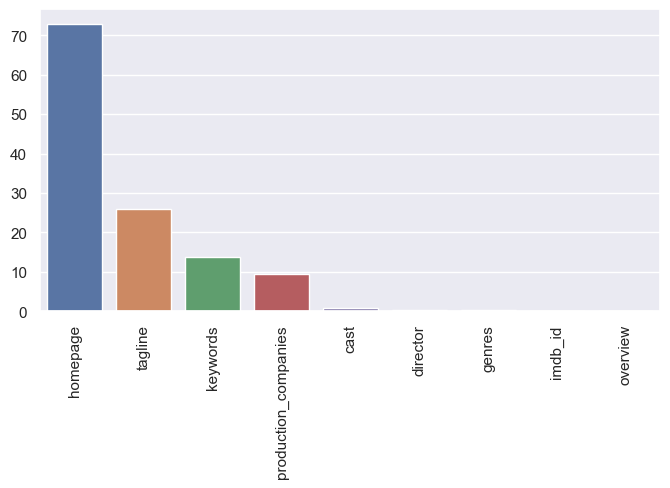

In [12]:
# Visualization of the percent_nan
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan.values[:,1], data=percent_nan)
plt.xticks(rotation = 90)
plt.show()

> There are columns that are not neccessary for us in the analysis ==> we will **drop** them!
>
> There are **misleading** in the columns **budget_adj and revenue_adj** is more than **50%** of the data = **zero**
>
> There are **duplicate values**
>
> There are **missing data**
>
> we will **create columns** that will help uss in the analysis

# Cleansing

In [13]:
# fill with median
fill_by_median(df['budget_adj'])
fill_by_median(df['revenue_adj'])

In [14]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [15]:
# Insert column about the decade
BINS = [1960,1970,1980,1990,2000,2010,2015]
LABELS =['60s','70s','80s','90s', '2000s', '2010s']

decade = pd.cut(df['release_year'], bins = BINS, labels = LABELS)
df.insert(2, 'decade', decade)

In [16]:
# Insert columns about the Profit
profit =  df['revenue_adj'] - df['budget_adj']
df.insert(3,'profit', profit)

In [17]:
# fill zeros with median
fill_by_median(df['revenue_adj'])
fill_by_median(df['budget_adj'])
df[['budget_adj', 'revenue_adj']].describe()

budget_adj   revenue_adj
count  1.086500e+04  1.086500e+04
mean   2.946232e+07  7.569185e+07
std    2.979317e+07  1.374701e+08
min    9.210911e-01  2.370705e+00
25%    2.272271e+07  4.392749e+07
50%    2.272271e+07  4.392749e+07
75%    2.272271e+07  4.392749e+07
max    4.250000e+08  2.827124e+09

In [18]:
# drop the columns
df.drop(DROP_COLUMNS, axis=1, inplace=True)

In [19]:
# deleaing with missing data
df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)

### Which genres are most popular from year to year?

In [20]:
year_gen = df.groupby('release_year')['genres'].agg(lambda x:x.value_counts().index[0])
year_gen[:5]

release_year
1961            Horror
1962             Drama
1963            Horror
1964    Comedy|Romance
1965             Drama
Name: genres, dtype: object

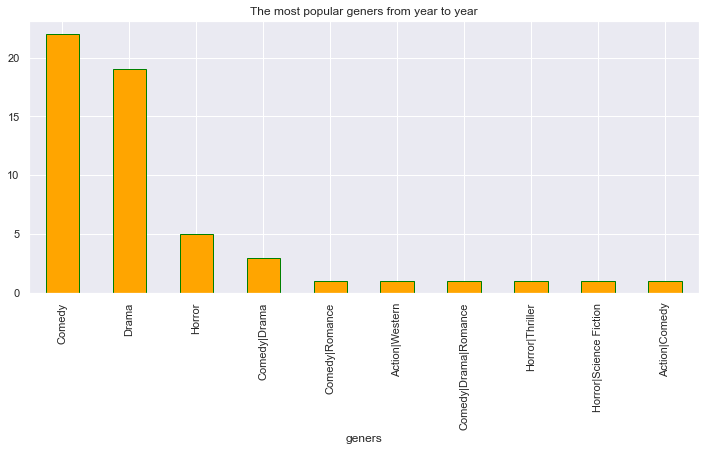

In [21]:
plt.figure(figsize=(12,5))
year_gen.value_counts().plot(kind='bar', facecolor='orange', edgecolor='green')
plt.title("The most popular geners from year to year")
plt.xlabel('geners');

> The most kind of geners is **Comedy** then **Drama** about the years

### The most profit decade by decade?

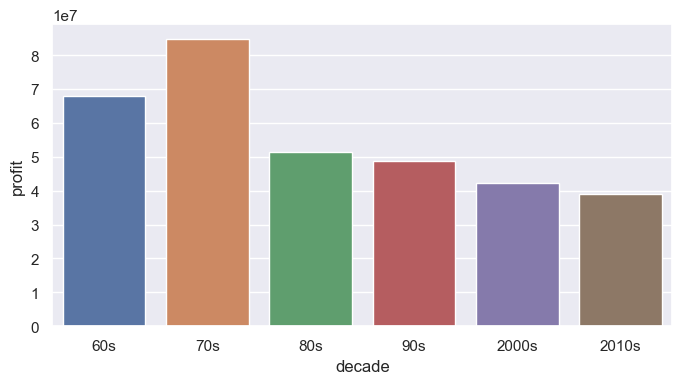

In [22]:
bar_plot('decade','profit', df)

> **70s** is the higest profit then **60s** about the decades

### The most budjet decade by decade?

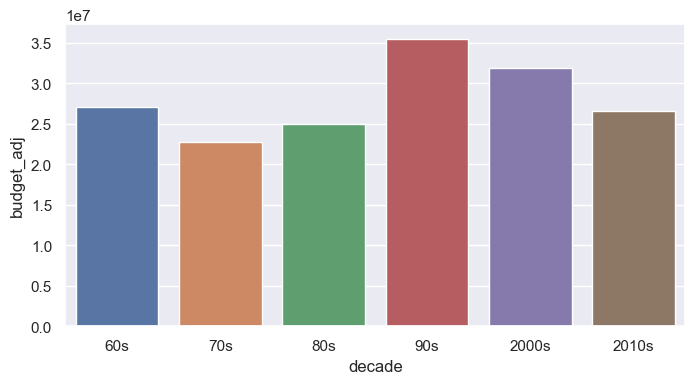

In [23]:
bar_plot('decade','budget_adj', df)

> **90s** is the highest budjet then **2000s** about the decades

### The most revenue decade by decade?

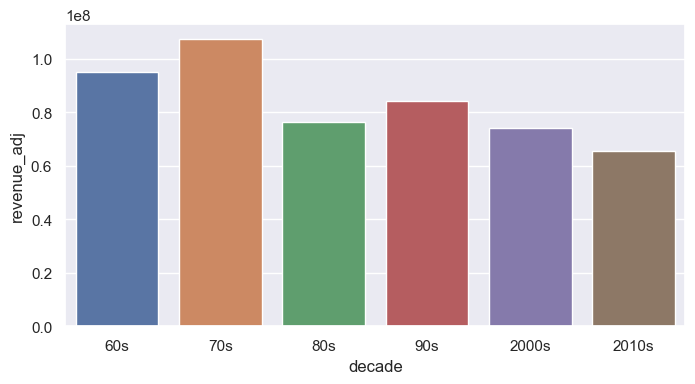

In [24]:
bar_plot('decade','revenue_adj', df)

> **70s** is the highest revenue then **60s** about the decades

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!